In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Shot Sense.zip to Shot Sense.zip


In [ ]:
# This cell mounts your Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os


In [ ]:
zip_path = "/content/shot_sense.zip"  # Path of your zip file
extract_path = "/content/shot_sense"   # Folder to extract files into


In [ ]:
import os
os.rename("/content/Shot Sense.zip", "/content/shot_sense.zip")


In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
os.listdir(extract_path)


['Shot Sense']

In [ ]:
os.listdir("/content/shot_sense/Shot Sense")


['Cover Drive', 'Sweep', 'Pull Shot']

In [ ]:
# Define the path to your main dataset folder
dataset_path = "/content/shot_sense/Shot Sense"

# Let's check the names of the classes (the subfolders)
class_names = os.listdir(dataset_path)
print("Class names found:", class_names)

# Let's also check how many images are in each folder
for class_name in class_names:
    class_folder_path = os.path.join(dataset_path, class_name)
    num_images = len(os.listdir(class_folder_path))
    print(f"Number of images in '{class_name}': {num_images}")

Class names found: ['Cover Drive', 'Sweep', 'Pull Shot']
Number of images in 'Cover Drive': 7
Number of images in 'Sweep': 5
Number of images in 'Pull Shot': 6


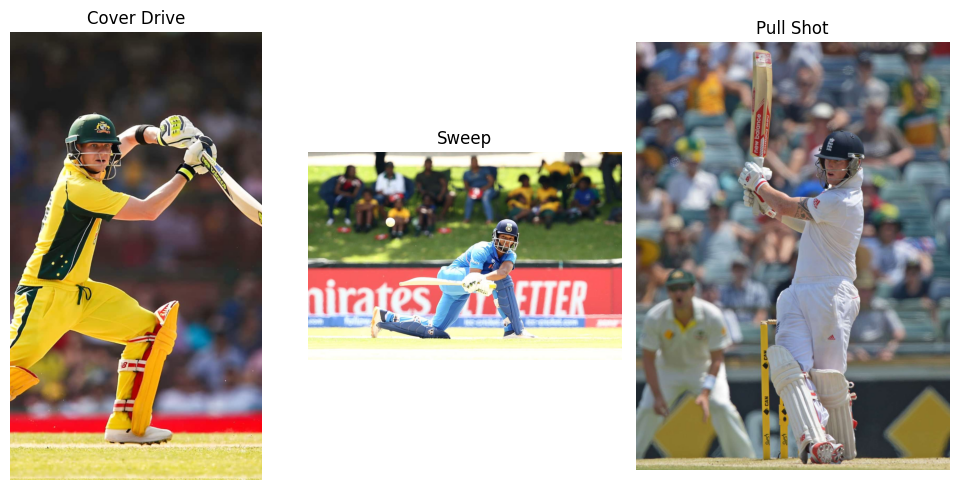

In [ ]:
# Import the necessary library for displaying images
import matplotlib.pyplot as plt
from PIL import Image  # PIL is used to open images

# Create a plot to show one image from each class
plt.figure(figsize=(10, 5))

# Loop through each class and display the first image
for i, class_name in enumerate(class_names):
    # 1. Get the path to the first image in the class folder
    class_folder_path = os.path.join(dataset_path, class_name)
    image_name = os.listdir(class_folder_path)[0] # Gets the first image
    image_path = os.path.join(class_folder_path, image_name)

    # 2. Open the image
    img = Image.open(image_path)

    # 3. Create a subplot and show the image
    plt.subplot(1, 3, i+1) # 1 row, 3 columns, position i+1
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off') # Hides the x and y axis ticks

plt.tight_layout()
plt.show()

In [ ]:
# Import the necessary library for data preparation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# We'll resize all images to a standard size (150x150 pixels is efficient for a small dataset)
img_size = (150, 150)
dataset_path = "/content/shot_sense/Shot Sense" # Make sure this path is correct

# Create a data generator object.
# This object will automatically label images based on their folder name.
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Most important: Normalize pixel values from 0-255 to 0-1
    validation_split=0.2, # crucial for review: Splitting data for training & validation
    horizontal_flip=True  # Data Augmentation: makes the model smarter with less data
)

# Create the training dataset generator
print("Loading training data...")
train_generator = train_datagen.flow_from_directory(
    directory=dataset_path,    # Point to your main folder ('Shot Sense')
    target_size=img_size,      # Resize all images to 150x150
    batch_size=4,              # Small batches because our dataset is small
    class_mode='categorical',  # Because we have multiple classes
    subset='training'          # This is the 80% for training
)

# Create the validation dataset generator
print("Loading validation data...")
validation_generator = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=img_size,
    batch_size=4,
    class_mode='categorical',
    subset='validation'        # This is the 20% for testing the model's progress
)

# Let's see what classes the generator found and how it mapped them
print("\nClass mapping (what the model will learn):", train_generator.class_indices)

Loading training data...
Found 13 images belonging to 3 classes.
Loading validation data...
Found 3 images belonging to 3 classes.

Class mapping (what the model will learn): {'Cover Drive': 0, 'Pull Shot': 1, 'Sweep': 2}


In [ ]:
# Build a simple Convolutional Neural Network (CNN)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # Use the generator to know how many classes we have!
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show the model summary - The final piece for your review!
print("Model Architecture Built Successfully!")
model.summary()

NameError: name 'tf' is not defined

In [ ]:
# Add this import line at the TOP of your model building cell
import tensorflow as tf

# Then your existing model code
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Show the model summary
print("Model Architecture Built Successfully!")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Architecture Built Successfully!


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,391,587 (9.12 MB)

 Trainable params: 2,391,587 (9.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
print("🔄 Training the AI model on your cricket shots...")
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=15  # The model will see your data 15 times
)

print("\n✅ Training complete! The AI has learned from your images.")

🔄 Training the AI model on your cricket shots...
Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - accuracy: 0.2917 - loss: 2.3192 - val_accuracy: 0.0000e+00 - val_loss: 1.0834
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2500 - loss: 1.6095 - val_accuracy: 0.3333 - val_loss: 1.2132
Epoch 3/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.2986 - loss: 1.3416 - val_accuracy: 0.3333 - val_loss: 1.1106
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7500 - loss: 0.9484 - val_accuracy: 0.0000e+00 - val_loss: 1.1113
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.7500 - loss: 1.0175 - val_accuracy: 0.3333 - val_loss: 1.1230
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0000e+00 - loss: 1.1313 - val_accuracy: 0.0000e+00 - val_loss: 1.1296
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5590 - loss: 0.9647 - val_accuracy: 0.3333 - val_loss: 1.2229
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.0000e+00 - loss: 1.2829 - val_accuracy: 0.3333 - val_loss: 1.2189
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.5833 - loss: 0.9515 - val_accuracy: 0.3333 - val_loss: 1.2203
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.8140 - val_accuracy: 0.0000e+00 - val

In [ ]:
# Save the trained model
model.save('/content/shot_sense_model.h5')
print("✅ Model saved as 'shot_sense_model.h5'")

# Also save to Google Drive for backup
model.save('/content/drive/MyDrive/shot_sense_model.h5')
print("✅ Model saved to Google Drive!")

✅ Model saved as 'shot_sense_model.h5'
✅ Model saved to Google Drive!


In [ ]:
# Save the model using the newer .keras format
model.save('/content/shot_sense_model.keras')  # Changed .h5 to .keras
print("✅ Model saved as 'shot_sense_model.keras'")

# Also save to Google Drive
model.save('/content/drive/MyDrive/shot_sense_model.keras')  # Changed .h5 to .keras
print("✅ Model saved to Google Drive!")

✅ Model saved as 'shot_sense_model.keras'
✅ Model saved to Google Drive!


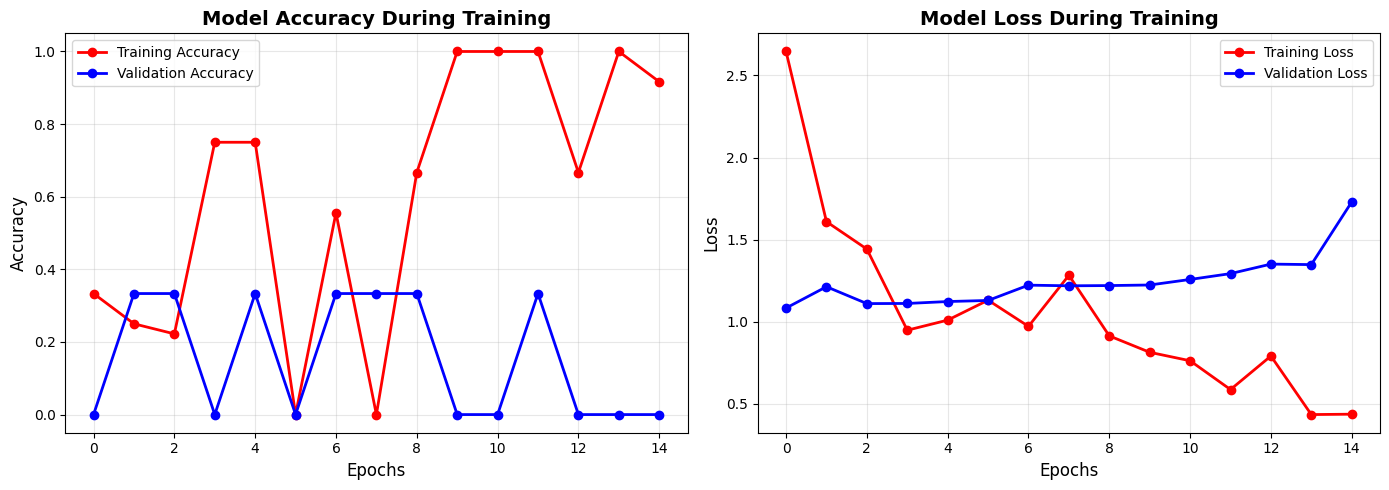

Final Training Accuracy: 91.67%
Final Validation Accuracy: 0.00%


In [ ]:
# Plot the training results with better formatting
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'ro-', label='Training Accuracy', linewidth=2)
plt.plot(epochs, val_acc, 'bo-', label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro-', label='Training Loss', linewidth=2)
plt.plot(epochs, val_loss, 'bo-', label='Validation Loss', linewidth=2)
plt.title('Model Loss During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final accuracy values
print(f"Final Training Accuracy: {acc[-1]:.2%}")
print(f"Final Validation Accuracy: {val_acc[-1]:.2%}")

In [ ]:
# Make a prediction on a new image
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your class names (important!)
class_names = ['Cover Drive', 'Pull Shot', 'Sweep']  # Update if your order is different

# Load and display the test image
test_image_path = ""C:\Users\Asus\OneDrive\Desktop\Shot Sense\Cover Drive\1475994-coverdrive-2.png""  # ⚠️ CHANGE THIS PATH!
# Replace with actual path to any image from your dataset

img = image.load_img(test_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.title('Test Image')
plt.show()

# Preprocess the image for prediction
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize like during training

# Make the prediction
prediction = model.predict(img_array)
predicted_class_idx = np.argmax(prediction[0])
confidence = np.max(prediction[0])

# Display results
print("\n🎯 PREDICTION RESULTS:")
print(f"Predicted Shot: {class_names[predicted_class_idx]}")
print(f"Confidence: {confidence:.2%}")
print("\nAll probabilities:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {prediction[0][i]:.2%}")

SyntaxError: invalid syntax (ipython-input-3270826667.py, line 10)

In [ ]:
# Find available images in your dataset
import os

dataset_path = "C:\Users\Asus\OneDrive\Desktop\Shot Sense.zip"

print("Available images in your dataset:")
print("=" * 40)

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)
    print(f"\n{class_name}:")
    for i, image_name in enumerate(images[:3]):  # Show first 3 images per class
        full_path = f"C:\Users\Asus\OneDrive\Desktop\Shot Sense.zip{class_name}/{image_name}"
        print(f"  {full_path}")
    if len(images) > 3:
        print(f"  ... and {len(images) - 3} more")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (ipython-input-1672536063.py, line 4)

In [ ]:
# See what files are in Colab storage
import os
print("Files in /content/ folder:")
!ls -la "/content/"

Files in /content/ folder:
total 57756
drwxr-xr-x 1 root root     4096 Nov 13 01:07 .
drwxr-xr-x 1 root root     4096 Nov 13 00:48 ..
drwxr-xr-x 4 root root     4096 Nov 11 14:29 .config
drwx------ 5 root root     4096 Nov 13 01:05 drive
drwxr-xr-x 1 root root     4096 Nov 11 14:29 sample_data
drwxr-xr-x 3 root root     4096 Nov 13 01:05 shot_sense
-rw-r--r-- 1 root root 28745512 Nov 13 01:07 shot_sense_model.h5
-rw-r--r-- 1 root root 28743911 Nov 13 01:07 shot_sense_model.keras
-rw-r--r-- 1 root root  1624301 Nov 13 01:04 shot_sense.zip


In [ ]:
from google.colab import files
import os

print("📤 Please upload your '1475994-coverdrive-2.png' image:")
uploaded = files.upload()

# Get the actual filename
uploaded_filename = list(uploaded.keys())[0]
print(f"✅ Successfully uploaded: {uploaded_filename}")

# Show the exact path to use
test_image_path = f"/content/{uploaded_filename}"
print(f"📁 Use this path: {test_image_path}")

📤 Please upload your '1475994-coverdrive-2.png' image:


Saving 157747.jpg to 157747.jpg
✅ Successfully uploaded: 157747.jpg
📁 Use this path: /content/157747.jpg


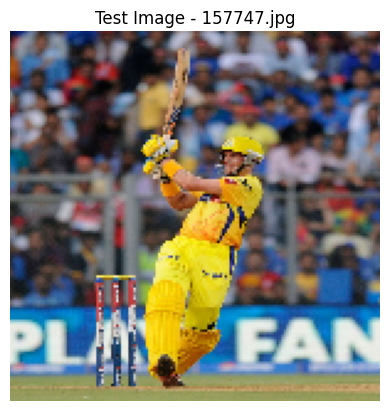

🔄 Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step

🎯 PREDICTION RESULTS:
📸 Image: 157747.jpg
✅ Predicted Shot: Pull Shot
💯 Confidence: 70.38%

📊 Detailed Probabilities:
   Cover Drive: 20.53%
   Pull Shot: 70.38%
   Sweep: 9.09%

🎉 The AI is very confident this is a Pull Shot!


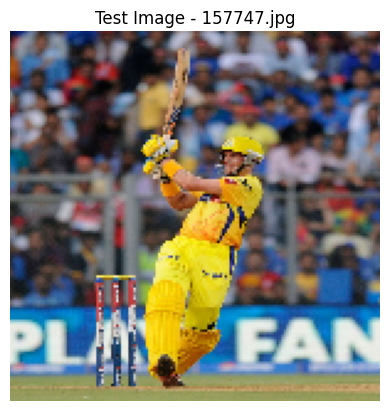

🔄 Making prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

🎯 PREDICTION RESULTS:
📸 Image: 157747.jpg
✅ Predicted Shot: Pull Shot
💯 Confidence: 70.38%

📊 Detailed Probabilities:
   Cover Drive: 20.53%
   Pull Shot: 70.38%
   Sweep: 9.09%

🎉 The AI is very confident this is a Pull Shot!


In [ ]:
# PREDICTION CODE FOR YOUR UPLOADED IMAGE
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Use the path of your uploaded image
test_image_path = "/content/157747.jpg"

# Load and display the test image
img = image.load_img(test_image_path, target_size=(150, 150))
plt.imshow(img)
plt.axis('off')
plt.title('Test Image - 157747.jpg')
plt.show()

# Preprocess the image for prediction
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize like during training

# Make the prediction
print("🔄 Making prediction...")
prediction = model.predict(img_array)
predicted_class_idx = np.argmax(prediction[0])
confidence = np.max(prediction[0])

# Display results
class_names = ['Cover Drive', 'Pull Shot', 'Sweep']
print("\n🎯 PREDICTION RESULTS:")
print("=" * 35)
print(f"📸 Image: 157747.jpg")
print(f"✅ Predicted Shot: {class_names[predicted_class_idx]}")
print(f"💯 Confidence: {confidence:.2%}")

print("\n📊 Detailed Probabilities:")
for i, class_name in enumerate(class_names):
    print(f"   {class_name}: {prediction[0][i]:.2%}")

# Show a result message based on confidence
if confidence > 0.7:
    print(f"\n🎉 The AI is very confident this is a {class_names[predicted_class_idx]}!")
elif confidence > 0.5:
    print(f"\n🤔 The AI thinks this is a {class_names[predicted_class_idx]}, but isn't very sure.")
else:
    print(f"\n❓ The AI is uncertain about this prediction.")